# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [3]:
df_1 = df[['index', 'data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']].copy()
df_1.drop_duplicates(inplace=True)
# df_1.set_index('index', inplace=True)
df_1.reset_index(inplace=True)
df_1.drop(columns='level_0', inplace=True)
df_1['data_ref'] = pd.to_datetime(df_1['data_ref'])
df_1

,index,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
0,8682,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa
1,12830,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa
2,2885,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa
3,16168,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa
4,12438,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa
...,...,...,...,...,...,...,...,...,...
14542,16065,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa
14543,3678,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa
14544,3405,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio
14545,16019,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa


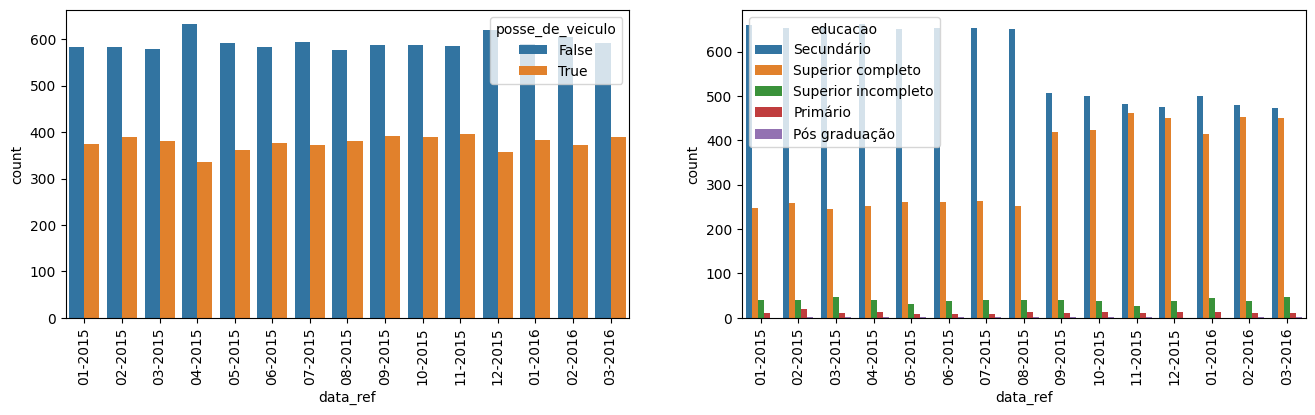

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))


ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=df_1, ax=axs[0])

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)


ax = sns.countplot(x='data_ref',  hue = 'educacao', data=df_1, ax=axs[1])

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

É interessante notar que a variável 'educacao' sofreu uma alteração ao longo do tempo, mas isso de dá ao fato dos clientes se formarem no mes de setembro, mostrando um aumento na contagem de clientes com a escolaridade de 'Superior Completo'

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

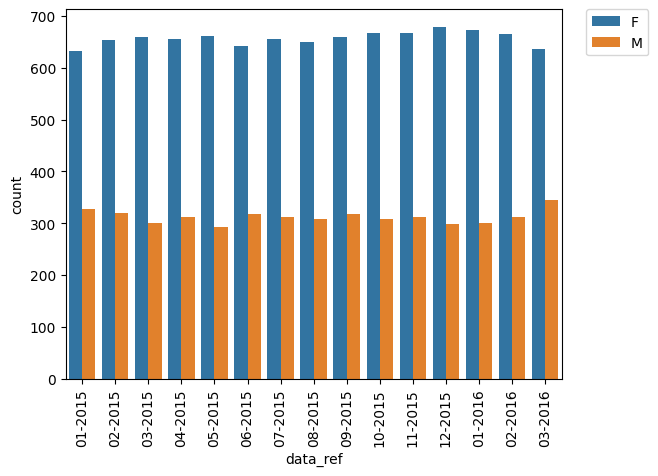

In [5]:
ax = sns.countplot(x='data_ref',  hue = 'sexo', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

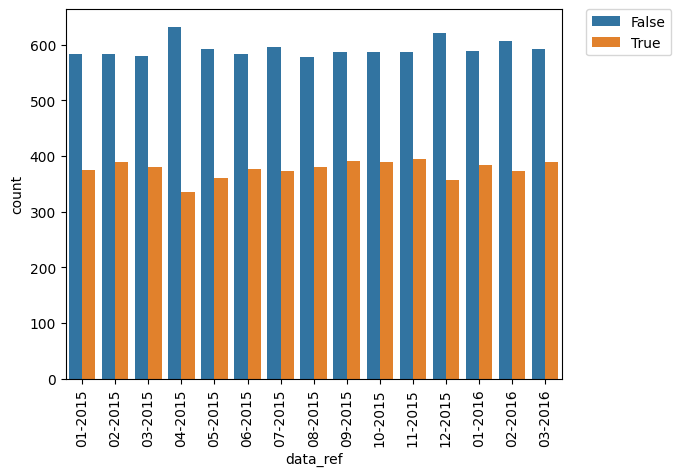

In [6]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

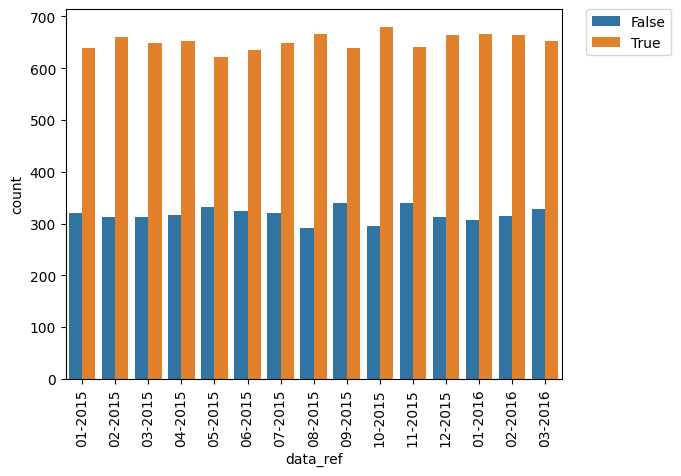

In [7]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

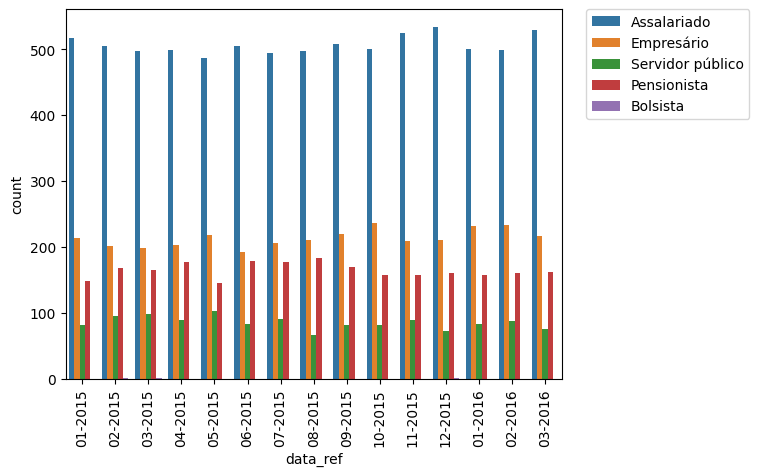

In [8]:
ax = sns.countplot(x='data_ref',  hue = 'tipo_renda', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

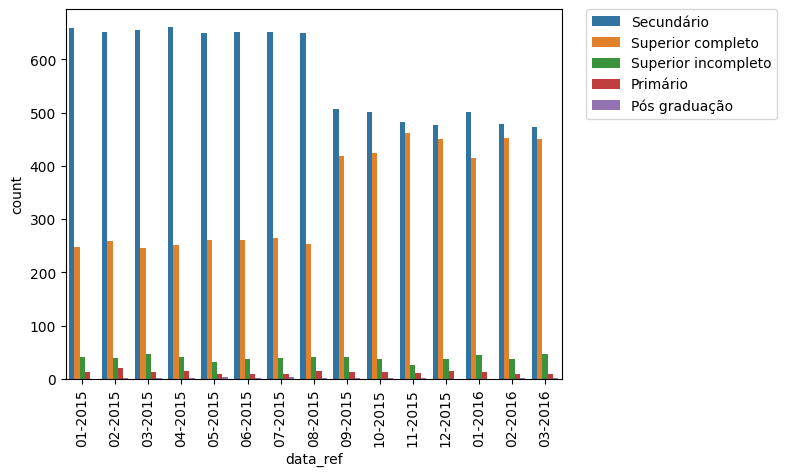

In [9]:
ax = sns.countplot(x='data_ref',  hue = 'educacao', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

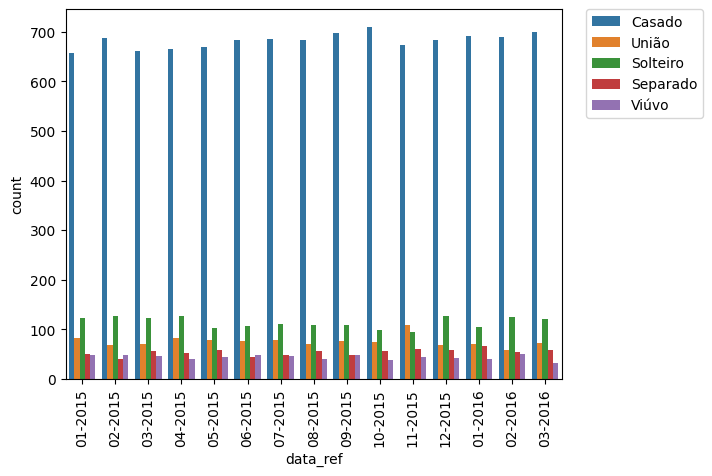

In [10]:
ax = sns.countplot(x='data_ref',  hue = 'estado_civil', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

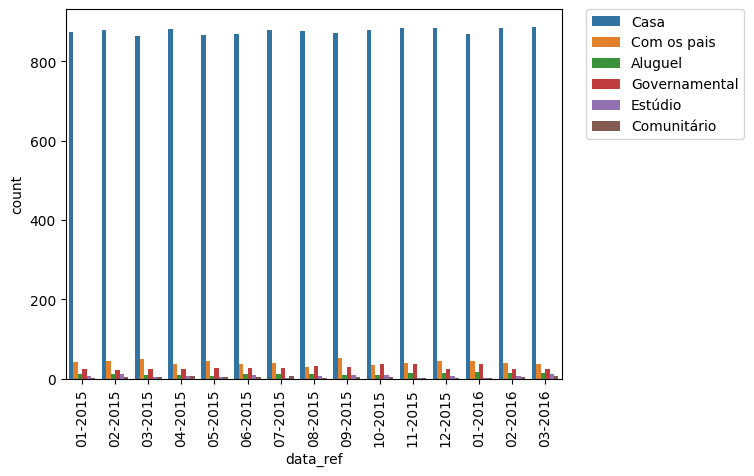

In [11]:
ax = sns.countplot(x='data_ref',  hue = 'tipo_residencia', data=df_1)

tick_labs = df_1['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(df_1['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Como ja citado anteriormente, a é possivel criar modelos de todas as variáveis com exceção da 'educacao', pois ela foi a unica da qual não se teve estabilidade ao longo do tempo, visto que os clientes podem se formar no Ensino superior, etc.